In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Load Datasets

In [2]:
gse202203 = pd.read_csv('GSE202203_withOS.csv')
gse202203_532Genes = pd.read_csv("GSE202203_New_df.csv")

In [3]:
target = gse202203['OS']
data = gse202203.drop('OS', axis=1)

In [4]:
print(data.head())

   Gene ID        A1BG  A1CF           A2M       A2ML1  A3GALT2       A4GALT  \
0  S000001  412.358202   0.0  23884.926531    1.426652      0.0  2836.330202   
1  S000002  105.952180   0.0   7526.736567  404.546684      0.0   274.625857   
2  S000003  157.582677   0.0  30855.152448  163.826684      0.0   549.653372   
3  S000006  104.325878   0.0  36483.893945  140.628321      0.0   306.256495   
4  S000008  145.012995   0.0  17015.951039    0.000000      0.0   615.226716   

   A4GNT         AAAS         AACS  ...    ZWILCH     ZWINT       ZXDA  \
0    0.0   976.445204  2161.033619  ...  308.9017  225.6337  224.14670   
1    0.0   378.742855   564.993344  ...  347.9658  594.7327  128.46000   
2    0.0  1198.252831  2299.233003  ...  378.5762  765.1066  200.75330   
3    0.0   906.179373  1059.479951  ...  542.4852  292.4805   77.21335   
4    0.0   564.519679   930.486799  ...  164.2343  291.8316  146.25330   

       ZXDB      ZXDC    ZYG11A     ZYG11B        ZYX      ZZEF1       ZZZ

## Boruta on 532 Genes

In [5]:
importance_df = pd.read_csv('importance_score_gse202203.csv')
print(importance_df.head())

  Unnamed: 0   meanImp  medianImp    minImp    maxImp  normHits   decision
0       CTSG  0.577395   0.875043 -1.873760  2.291230       0.0  Tentative
1       BBS1  0.927332   1.055068 -0.733489  2.940368       0.0  Tentative
2   SERPINH1  1.353295   1.721419 -0.662174  2.758337       0.0  Tentative
3      CCNB1  2.293211   2.347289  1.605204  3.078364       0.0  Tentative
4      HIF1A  1.093440   1.261669 -1.124029  2.739109       0.0  Tentative


In [6]:
# sort in descending order by mean_importance
importance_df = importance_df.sort_values(by='meanImp', ascending=False)
# get top 80 features
top_features = importance_df['Unnamed: 0'][:80]
top_features = top_features.tolist()
# write top features into excel file
top_features_df = pd.DataFrame(top_features)
top_features_df.to_excel('boruta_top_features_gse202203.xlsx', index=False)
top_features.append('OS')

In [7]:
gse202203_top = gse202203[top_features]

In [8]:
target_boruta = gse202203_top['OS']
data_boruta = gse202203_top.drop('OS', axis=1)

In [9]:
# run random forest
X_train_boruta, X_test_boruta, y_train_boruta, y_test_boruta = train_test_split(data_boruta, target_boruta, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train_boruta = sc.fit_transform(X_train_boruta)
X_test_boruta = sc.transform(X_test_boruta)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_boruta, y_train_boruta)
y_pred_boruta = rf.predict(X_test_boruta)
accuracy_boruta = accuracy_score(y_test_boruta, y_pred_boruta)
print('Accuracy:', accuracy_boruta)

Accuracy: 0.869639794168096


In [10]:
accuracy_list_boruta = []
for i in range(20):
    X_train_boruta, X_test_boruta, y_train_boruta, y_test_boruta = train_test_split(data_boruta, target_boruta, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_boruta = scaler.fit_transform(X_train_boruta)
    X_test_boruta = scaler.transform(X_test_boruta)

    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train_boruta, y_train_boruta)
    y_pred_boruta = rf.predict(X_test_boruta)
    accuracy = accuracy_score(y_test_boruta, y_pred_boruta)
    accuracy_list_boruta.append(accuracy)

## SPS and HUB61

In [11]:
signatures = pd.read_excel('signatures.xlsx')
# print(signatures.head())
SPS_genes = signatures['SPS']
sps_genes_in_dataset = []
sps_genes_in_dataset.append('OS')
for gene in SPS_genes:
    if gene in gse202203.columns:
        sps_genes_in_dataset.append(gene)

gse7390_sps = gse202203[sps_genes_in_dataset]
print(sps_genes_in_dataset.__len__())

81


In [12]:
target_sps = gse202203['OS']
data_sps = gse202203.drop('OS', axis=1)


In [13]:
hub61_genes_in_dataset = []
hub61_genes_in_dataset.append('OS')
for gene in signatures['HUB61']:
    if gene in gse202203.columns:
        hub61_genes_in_dataset.append(gene)

gse7390_hub61 = gse202203[hub61_genes_in_dataset]
print(hub61_genes_in_dataset.__len__())


55


In [14]:
# drop all non numeric columns
data_sps_clean = data_sps.select_dtypes(include=[np.number])


In [15]:
print(data_sps.shape)
print(data_sps_clean.shape)

(2912, 19583)
(2912, 19582)


In [16]:
# run random forest
X_train_sps, X_test_sps, y_train_sps, y_test_sps = train_test_split(data_sps_clean, target_sps, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_sps = scaler.fit_transform(X_train_sps)
X_test_sps = scaler.transform(X_test_sps)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_sps, y_train_sps)
y_pred_sps = rf.predict(X_test_sps)
print(accuracy_score(y_test_sps, y_pred_sps))

0.8679245283018868


In [17]:
# run random forest 100 times
accuracy_list_sps = []
for i in range(20):
    X_train_sps, X_test_sps, y_train_sps, y_test_sps = train_test_split(data_sps_clean, target_sps, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_sps = scaler.fit_transform(X_train_sps)
    X_test_sps = scaler.transform(X_test_sps)

    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train_sps, y_train_sps)
    y_pred_sps = rf.predict(X_test_sps)
    accuracy = accuracy_score(y_test_sps, y_pred_sps)
    accuracy_list_sps.append(accuracy)

## Random

In [18]:
random_genes = np.random.choice(data.columns, 80, replace=False)
random_genes = random_genes.tolist()
random_genes.append('OS')

gse7390_random = gse202203[random_genes]

In [19]:
data_random = gse7390_random.drop('OS', axis=1)
target_random = gse7390_random['OS']

In [20]:
X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(data_random, target_random, test_size=0.2, random_state=42)

sc = StandardScaler()
X_train_random = sc.fit_transform(X_train_random)
X_test_random = sc.transform(X_test_random)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_random, y_train_random)
y_pred_random = rf.predict(X_test_random)
accuracy_random = accuracy_score(y_test_random, y_pred_random)
print('Accuracy:', accuracy_random)

Accuracy: 0.869639794168096


In [21]:
# find number of random genes in boruta genes
count_boruta = 0
for gene in random_genes:
    if gene in top_features:
        count_boruta += 1
print(count_boruta)

count_sps = 0
for gene in random_genes:
    if gene in sps_genes_in_dataset:
        count_sps += 1
print(count_sps)

1
1


In [23]:
accuracy_list_random = []
for i in range(20):
    X_train_random, X_test_random, y_train_random, y_test_random = train_test_split(data_random, target_random, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_random = scaler.fit_transform(X_train_random)
    X_test_random = scaler.transform(X_test_random)

    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train_random, y_train_random)
    y_pred_random = rf.predict(X_test_random)
    accuracy = accuracy_score(y_test_random, y_pred_random)
    accuracy_list_random.append(accuracy)

## Random from 532

In [24]:
random_532 = np.random.choice(gse202203_532Genes.columns, 80, replace=False)
random_532 = random_532.tolist()
random_532.append('OS')

gse7390_random_532 = gse202203_532Genes[random_532]


In [25]:
count_boruta_532 = 0
for gene in random_532:
    if gene in top_features:
        count_boruta_532 += 1
print(count_boruta_532)

count_sps_532 = 0
for gene in random_532:
    if gene in sps_genes_in_dataset:
        count_sps_532 += 1
print(count_sps_532)

11
11


In [26]:
data_random_532 = gse7390_random_532.drop('OS', axis=1)
target_random_532 = gse7390_random_532['OS']

In [27]:
X_train_random_532 , X_test_random_532, y_train_random_532, y_test_random_532 = train_test_split(data_random_532, target_random_532, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_random_532 = scaler.fit_transform(X_train_random_532)
X_test_random_532 = scaler.transform(X_test_random_532)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_random_532, y_train_random_532)
y_pred_random_532 = rf.predict(X_test_random_532)
print(accuracy_score(y_test_random_532, y_pred_random_532))


0.8644939965694682


In [28]:
accuracy_list_random_532 = []
for i in range(100):
    X_train_random_532, X_test_random_532, y_train_random_532, y_test_random_532 = train_test_split(data_random_532, target_random_532, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_random_532 = scaler.fit_transform(X_train_random_532)
    X_test_random_532 = scaler.transform(X_test_random_532)

    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train_random_532, y_train_random_532)
    y_pred_random_532 = rf.predict(X_test_random_532)
    accuracy = accuracy_score(y_test_random_532, y_pred_random_532)
    accuracy_list_random_532.append(accuracy)

In [37]:
# remove 80 runs from the list randomly
accuracy_list_random_532 = np.array(accuracy_list_random_532)

accuracy_list_random_532 = np.delete(accuracy_list_random_532, np.random.choice(accuracy_list_random_532.size, 80, replace=False))

## FWSE


In [29]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample

class FWSE(BaseEstimator, TransformerMixin):
    def __init__(self, filter_estimators, wrapper_estimators, n_bootstraps=10, random_state=0):
        self.filter_estimators = filter_estimators
        self.wrapper_estimators = wrapper_estimators
        self.n_bootstraps = n_bootstraps
        self.random_state = random_state
        self.feature_ranking_ = None

    def fit(self, X, y):
        
        filter_rankings = []
            
        for estimator in self.filter_estimators:

            estimator_rankings = []
        
            for _ in range(self.n_bootstraps):           
                
                X_bootstrapped, y_bootstrapped = resample(X, y, random_state=self.random_state)
                fitted_estimator = estimator.fit(X_bootstrapped, y_bootstrapped)

                if hasattr(fitted_estimator, 'coef_'):
                    bootstrap_importances = fitted_estimator.coef_.flatten()
                    bootstrap_ranking = np.argsort(np.argsort(-1*bootstrap_importances))

                elif hasattr(fitted_estimator, 'feature_importances_'):
                    bootstrap_importances = fitted_estimator.feature_importances_
                    bootstrap_ranking = np.argsort(np.argsort(-1*bootstrap_importances))

                elif hasattr(fitted_estimator, 'ranking_'):
                    bootstrap_ranking = fitted_estimator.ranking_
        
                estimator_rankings.append(bootstrap_ranking)

            filter_rankings.append(self.aggregate_rankings(estimator_rankings))
        
        aggregated_ranking_filter = self.aggregate_rankings(filter_rankings)
        filtered_features = np.argsort(aggregated_ranking_filter)[:len(aggregated_ranking_filter) // 2]

        wrapper_rankings = []
            
        for estimator in self.wrapper_estimators:

            estimator_rankings = []
        
            for _ in range(self.n_bootstraps):           
                
                X_bootstrapped, y_bootstrapped = resample(X[:, filtered_features], y, random_state=self.random_state)
                fitted_estimator = estimator.fit(X_bootstrapped, y_bootstrapped)

                if hasattr(fitted_estimator, 'coef_'):
                    bootstrap_importances = fitted_estimator.coef_.flatten()
                    bootstrap_ranking = np.argsort(np.argsort(-1*bootstrap_importances))

                elif hasattr(fitted_estimator, 'feature_importances_'):
                    bootstrap_importances = fitted_estimator.feature_importances_
                    bootstrap_ranking = np.argsort(np.argsort(-1*bootstrap_importances))

                elif hasattr(fitted_estimator, 'ranking_'):
                    bootstrap_ranking = fitted_estimator.ranking_

                estimator_rankings.append(bootstrap_ranking)

            wrapper_rankings.append(self.aggregate_rankings(estimator_rankings))
            
        aggregated_ranking_wrapper = self.aggregate_rankings(wrapper_rankings)
        final_ranking = np.array(filtered_features[np.argsort(aggregated_ranking_wrapper)].tolist() + aggregated_ranking_filter[len(aggregated_ranking_filter) // 2:].tolist())
        self.feature_ranking_ = final_ranking 

        return self

    def transform(self, X):
        if self.feature_ranking_ is None:
            raise ValueError("FWSE has not been fitted yet.")
        return X[:, self.feature_ranking_]

    def aggregate_rankings(self, rankings):
        aggregate_ranking = np.argsort(np.argsort(np.sum(rankings, axis=0)))
        return aggregate_ranking

In [30]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(gse202203_532Genes, target, test_size=0.2, random_state=0)

filter_estimators = [RandomForestClassifier(n_estimators=100, random_state=0)]
wrapper_estimators = [LogisticRegression(max_iter=1000, random_state=0)]

fwse_new = FWSE(filter_estimators, wrapper_estimators, n_bootstraps=10, random_state=0)

fwse_new.fit(X_train_new.values, y_train_new.values)
X_train_selected_new = fwse_new.transform(X_train_new.values)

selected_features_new = gse202203_532Genes.columns[fwse_new.feature_ranking_]
selected_features_new = selected_features_new[:80]

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [31]:
selected_features_new = selected_features_new.tolist()
selected_features_df = pd.DataFrame(selected_features_new)
selected_features_df.to_excel('fwse_selected_features_gse202203.xlsx', index=False)
selected_features_new.append('OS')

In [32]:
gse202203_fwse = gse202203_532Genes[selected_features_new]
print(gse202203_fwse.head())

       GTSE1      LYL1     TMEFF1      CENPL      HMBS    SLC22A3     INCENP  \
0   31.33332  118.3240   5.179214   76.28165  572.8914  15.466690   501.7066   
1  306.30670  197.0364  89.537420  120.21790  211.2400  24.080020   683.5600   
2  326.42660  196.8000   2.453330  273.41840  592.7810  26.960020  1035.1400   
3  289.73330  171.8000  63.791850  247.51300  801.2442  52.080010  1144.2330   
4   87.47998  113.7733  57.964370   76.30476  446.5955   9.106649   463.5077   

       BRCA2       EPHB1      CDCA7  ...      KLF1     GINS2       RAN  \
0   58.73332   45.173320   19.58666  ...  2.853331  177.6267  5332.148   
1  462.65340    6.333363  639.05340  ...  0.000000  307.4968  5684.837   
2  603.06660   40.933320   80.60143  ...  2.706676  146.1200  5791.603   
3  273.19990  585.685000  909.56000  ...  5.706662  472.0387  7573.142   
4   70.01326   43.098340   33.53334  ...  2.786658  106.9267  3023.150   

       UPF1      LRRC17       VCL      MYBL2     H2AFZ     SNRPB  OS  
0  

In [33]:
target_fwse = gse202203_fwse['OS']
data_fwse = gse202203_fwse.drop('OS', axis=1)

In [34]:
X_train_fwse, X_test_fwse, y_train_fwse, y_test_fwse = train_test_split(data_fwse, target_fwse, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_fwse = scaler.fit_transform(X_train_fwse)
X_test_fwse = scaler.transform(X_test_fwse)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_fwse, y_train_fwse)
y_pred_fwse = rf.predict(X_test_fwse)
print(accuracy_score(y_test_fwse, y_pred_fwse))

0.8713550600343053


In [35]:
# run random forest 100 times
accuracy_list_fwse = []
for i in range(20):
    X_train_fwse, X_test_fwse, y_train_fwse, y_test_fwse = train_test_split(data_fwse, target_fwse, test_size=0.2, random_state=i)

    scaler = StandardScaler()
    X_train_fwse = scaler.fit_transform(X_train_fwse)
    X_test_fwse = scaler.transform(X_test_fwse)

    rf = RandomForestClassifier(n_estimators=100, random_state=i)
    rf.fit(X_train_fwse, y_train_fwse)
    y_pred_fwse = rf.predict(X_test_fwse)
    accuracy = accuracy_score(y_test_fwse, y_pred_fwse)
    accuracy_list_fwse.append(accuracy)
    

In [39]:
# check array length 
print(accuracy_list_boruta.__len__())
print(accuracy_list_sps.__len__())
print(accuracy_list_random.__len__())
print(accuracy_list_random_532.__len__())
print(accuracy_list_fwse.__len__)

20
20
20
20
<method-wrapper '__len__' of list object at 0x000001E68A544800>


In [41]:
results_df = pd.DataFrame(
    {
        'Boruta': accuracy_list_boruta,
        'SPS': accuracy_list_sps,
         'Random': accuracy_list_random,
        'Random_532': accuracy_list_random_532,
        "FWSE": accuracy_list_fwse
    }
)

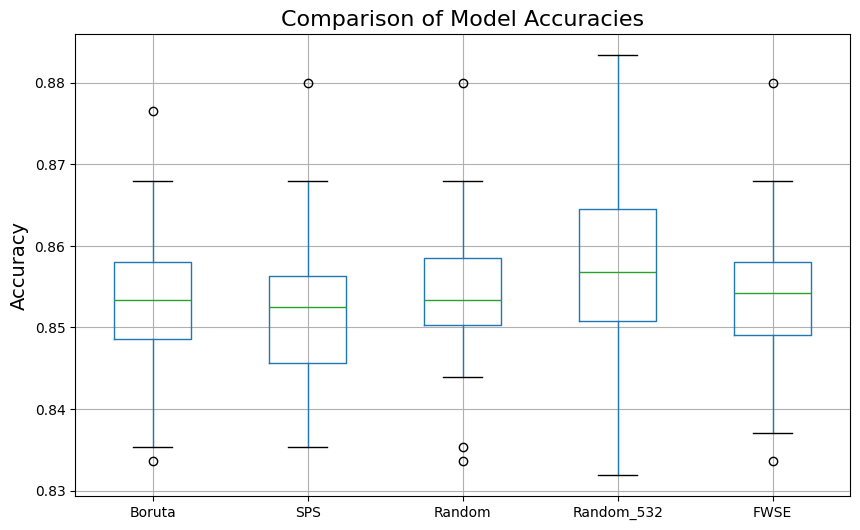

In [42]:
plt.figure(figsize=(10, 6))  # Set the figure size
results_df.boxplot()  # Create a boxplot
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

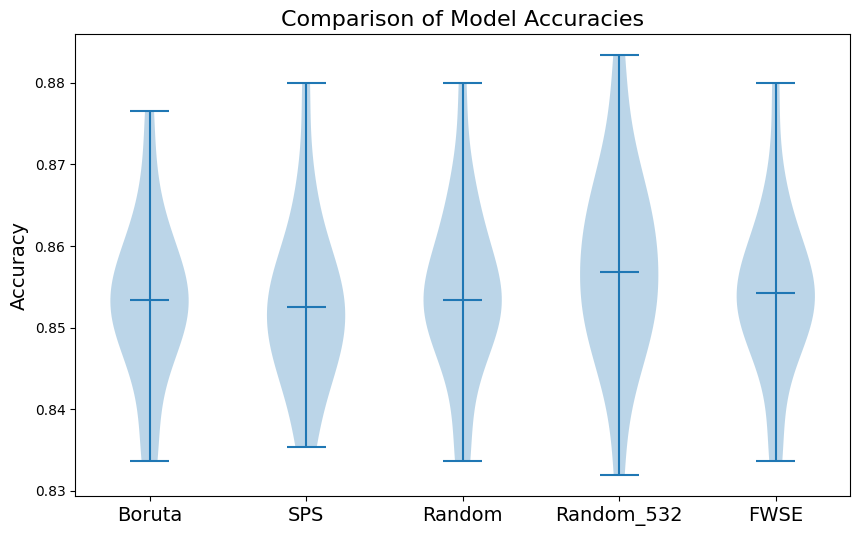

In [45]:
# violin plot
plt.figure(figsize=(10, 6))  # Set the figure size

# Create a violin plot
plt.violinplot(results_df.values, showmedians=True)

# Add labels and title
plt.xticks([1, 2, 3,4, 5], results_df.columns, fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Comparison of Model Accuracies', fontsize=16)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

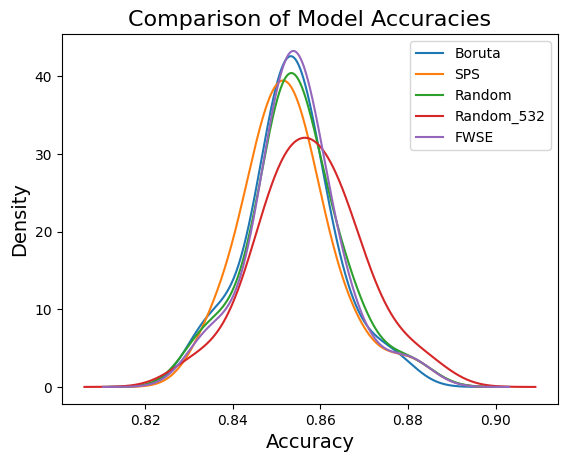

In [46]:
# density plot
plt.figure(figsize=(10, 6))  # Set the figure size
results_df.plot(kind='density')  # Create a density plot
plt.title('Comparison of Model Accuracies', fontsize=16)
plt.ylabel('Density', fontsize=14)
plt.xlabel('Accuracy', fontsize=14)
plt.show()

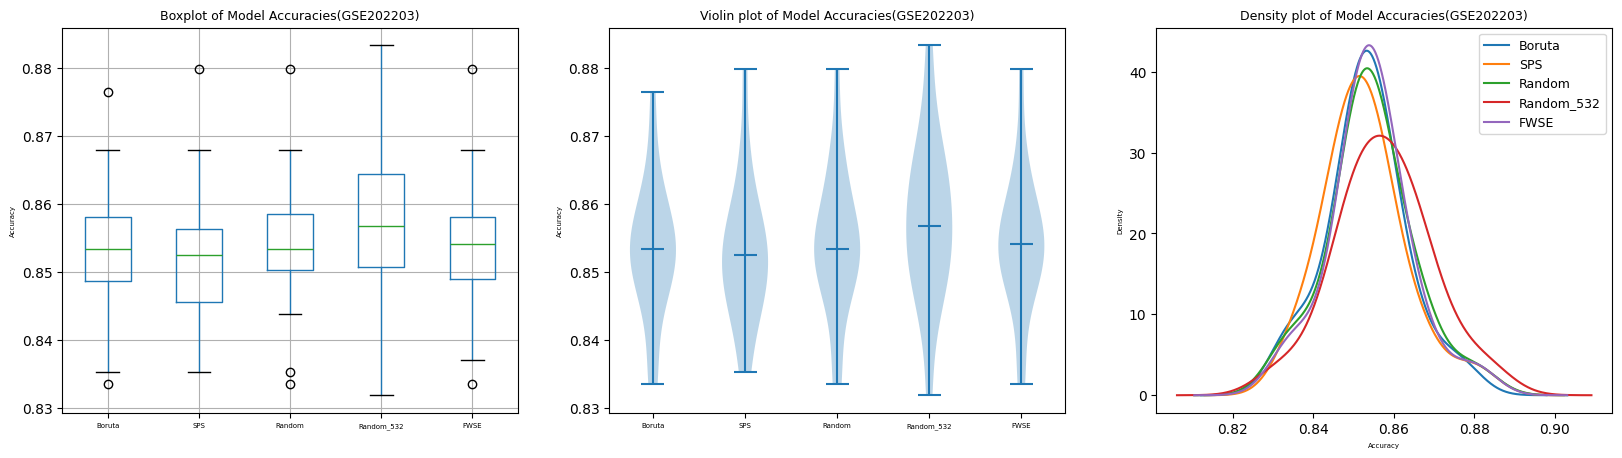

In [55]:
# plot all boxplot, violin plot and desnity plot in one figure
fig, axs = plt.subplots(1,3, figsize=(20,5))

# Boxplot
results_df.boxplot(ax=axs[0])
axs[0].set_ylabel('Accuracy', fontsize=5)
axs[0].set_title('Boxplot of Model Accuracies(GSE202203)', fontsize=9)
axs[0].set_xticks([1, 2, 3, 4, 5])
axs[0].set_xticklabels(results_df.columns, fontsize=5)

# Violin plot
axs[1].violinplot(results_df.values, showmedians=True)
axs[1].set_xticks([1, 2, 3, 4, 5])
axs[1].set_xticklabels(results_df.columns, fontsize=5)
axs[1].set_ylabel('Accuracy', fontsize=5)
axs[1].set_title('Violin plot of Model Accuracies(GSE202203)', fontsize=9)

# Density plot
results_df.plot(kind='density', ax=axs[2])
axs[2].set_title('Density plot of Model Accuracies(GSE202203)', fontsize=9)
axs[2].set_ylabel('Density', fontsize=5)
axs[2].set_xlabel('Accuracy', fontsize=5)
axs[2].legend(fontsize=9)

plt.show()